## decision tree drug prediction
### read data

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [33]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [34]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X.shape

(200, 5)

### clean data 

In [35]:
from sklearn import preprocessing
# change sex ["F", "M"] to [0, 1]
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])
X[:, 1] =le_sex.transform(X[:, 1])
# change BP to normal number
le_bp = preprocessing.LabelEncoder()
le_bp.fit(["LOW", "NORMAL", "HIGH"])
X[:, 2] = le_bp.transform(X[:, 2])
# change Cholesterol to normal number 
le_ch = preprocessing.LabelEncoder()
le_ch.fit(["NORMAL", "HIGH"])
X[:, 3] = le_ch.transform(X[:, 3])
X[:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [37]:
y = df["Drug"].values
y.shape

(200,)

### data separation

In [45]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=4)
print(f"train x: {xtrain.shape} train y: {ytrain.shape}")
print(f"test x: {xtest.shape} test y: {ytest.shape}")

train x: (160, 5) train y: (160,)
test x: (40, 5) test y: (40,)


## training the machine

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tr = DecisionTreeClassifier(criterion="entropy", max_depth=4)
tr.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [42]:
from sklearn.metrics import accuracy_score
yhat = tr.predict(xtest)
print("evaluation score:", accuracy_score(ytest, yhat))

evaluation score: 0.95


## visualizing node 

[Text(0.625, 0.9, 'x[4] <= 14.627\nentropy = 1.923\nsamples = 160\nvalue = [17, 13, 11, 43, 76]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.762\nsamples = 84\nvalue = [17, 13, 11, 43, 0]'),
 Text(0.5625, 0.8, 'True  '),
 Text(0.25, 0.5, 'x[0] <= 52.5\nentropy = 0.987\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\nentropy = 0.729\nsamples = 54\nvalue = [0, 0, 11, 43, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\nentropy = 0.99\nsamples = 25\nvalue = [0.0, 0.0, 11.0, 14.0, 0.0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 14\nvalue = [0, 0, 0, 14, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 0, 29, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 76\nvalue = [0, 0, 0, 0, 76]'),
 Text(0.6875, 0.8, '  False')]

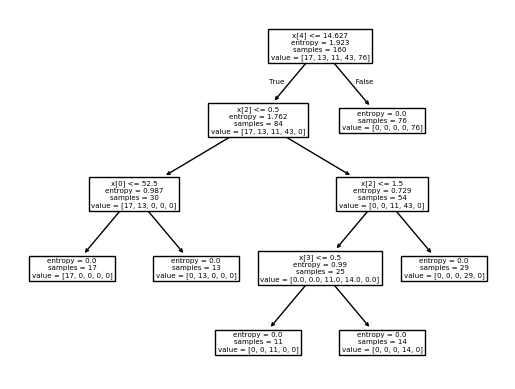

In [46]:
plot_tree(tr)